# Stepwise methods to data exploration
 - Import data, and explore features: Feature exploration is performed to to have a thorough understanding of the dataframe.
     - Questions to ask are the following:
         - What are the features available?
         - What are the data types of each feature?
         - Are there Null, or NaN values in the data?
         - What are the steps necessary to clean the data?
         - Are there target features that are interesting to me/my questions?
         - Determine the statistical analysis that can be performed given the available data.
 - Cleaning and feature engineering
      - Once a good understanding of the data has been established the following questions will help guide you through the cleaning and analysis of the dataframe:
          - What questions can be asked with the available data, and what questions would I like to ask from the data?
          - Has the data been cleaned enough to help answer the questions I would like to ask of the data?
          - Are there features I can engineer to ask better questions, or obtain answers to the questions I already have?
          - Make sure to write down an overarching qustion when feature engineering so that it remains a guiding tool during your analysis.
 - Analysis and Visualizations
     - Perform sound statistical tests, and provide visualizations to support those tests
     - The type of libraries used are vital in rendering aesthetically, and user friendly visualizations.
     - [MatplotLib](https://matplotlib.org) is a more intricate library to work with.  [Plotly](https://plotly.com/python/) provides a more user friendly rendition that can be inbetted and interactive on a portfolio site.

###### Note: This exploration is being performed to practice using data visualization tools.  A large portion of this work can be done with the [Pandas Profilling Package](https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html).

In [2]:
import plotly
import matplotlib
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import IFrame
from scipy.stats.distributions import chi2

In [3]:
# Reading in data as csv with delimiter ';'
# Note: previously, the dataframe used was the sleepdata.csv, now using an updated
# dataframe that contains all of the previously collected sleep data, as well as the
# most recently collected data, namely over 400 days of data.

df = pd.read_csv('./sleepdata2.csv', delimiter=';')

In [4]:
# What are the features available in my dataframe?

# Features that standout are [0:4]; they may potentnially
# be the features of interest in this dataframe.
# The target feature being 'Sleep quality'

df.head(3)

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2018-08-21 00:17:44,2018-08-21 06:31:59,55%,6:14,NaN,NaN,0,0
1,2018-08-22 00:08:58,2018-08-22 06:48:15,77%,6:39,NaN,NaN,0,0
2,2018-08-23 00:26:59,2018-08-23 05:14:15,57%,4:47,NaN,NaN,0,0


In [5]:
# What are the datatypes of the available features?

# Note: 'Start' and 'End' colummns should be datetime types but appear
# to be 'object'; 'Sleep quality' and 'Time in bed' are also float, and
# datetime respectively but appear as 'Object' as well.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Start             599 non-null    object
 1   End               599 non-null    object
 2   Sleep quality     599 non-null    object
 3   Time in bed       599 non-null    object
 4   Wake up           192 non-null    object
 5   Sleep Notes       177 non-null    object
 6   Heart rate        599 non-null    int64 
 7   Activity (steps)  599 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 37.6+ KB


In [6]:
# Are there Null vallues in the dataframe?

# 'Wake up' and 'Sleep Notes' columns appear to contain
# null values; further exploration of these two will be necessary

print("Sleep data null values in:", '\n', 
       df[['Wake up', 'Sleep Notes']].isnull().sum())

Sleep data null values in: 
 Wake up        407
Sleep Notes    422
dtype: int64


In [7]:
# Further exploring 'Heart rate', 'Wake up', and 'Sleep Notes' columns

# It can be safe to say that the majority of the available values will
# not contribute much to the analysis to be performed, so these columns
# can be discarted.

df[['Heart rate', 'Wake up', 'Sleep Notes']].describe(include=['object', 'int', 'float'])

,Heart rate,Wake up,Sleep Notes
count,599.000000,192,177
unique,NaN,3,38
top,NaN,:|,Ate late:Coffee:Stressful day
freq,NaN,138,40
mean,2.425710,NaN,NaN
std,11.852525,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,0.000000,NaN,NaN


In [8]:
# First step in cleaning the data
# Dropping the 'Heart rate', 'Wake up', and 'Sleep Notes' columns

df = df.drop(columns=['Heart rate', 'Wake up', 'Sleep Notes'])

df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps)
0,2018-08-21 00:17:44,2018-08-21 06:31:59,55%,6:14,0
1,2018-08-22 00:08:58,2018-08-22 06:48:15,77%,6:39,0
2,2018-08-23 00:26:59,2018-08-23 05:14:15,57%,4:47,0
3,2018-08-26 02:22:35,2018-08-26 06:25:43,35%,4:03,0
4,2018-08-27 00:54:25,2018-08-27 08:24:27,62%,7:30,0


In [9]:
# Step two in clenaing the data
# Convert string values to floats

df['Sleep quality'] = df['Sleep quality'].str.rstrip('%').astype('float') / 100
df['Sleep quality'].head()

0    0.55
1    0.77
2    0.57
3    0.35
4    0.62
Name: Sleep quality, dtype: float64

In [10]:
# .info() provides us with insight into the data

# 'Start' and 'End' column still remain as objects, when
# they should in fact be Datetime

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             599 non-null    object 
 1   End               599 non-null    object 
 2   Sleep quality     599 non-null    float64
 3   Time in bed       599 non-null    object 
 4   Activity (steps)  599 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 23.5+ KB


In [11]:
# Looking to create a column of days from data contained in the 'Start' column

print(df['Time in bed'].describe(), df['Start'].describe())

count      599
unique     267
top       4:47
freq         7
Name: Time in bed, dtype: object count                     599
unique                    599
top       2018-12-05 01:23:01
freq                        1
Name: Start, dtype: object


In [12]:
# pandas documentation states 'dayofweek' starts with mon = 0
# Test to find day of the week

copy_1_date = pd.Timestamp(df['Start'][0])
print(f"Day of the week: {copy_1_date.dayofweek}, Date: {df['Start'][0]}")

Day of the week: 1, Date: 2018-08-21 00:17:44


# Interesting features to explore further:
- Reconstruct weekday column by running a for loop to make sure that the Start and End columns utilize the start day adequately.  Reason for this is that some days the sleep time was past midnight, which implies that it is in fact using the innappropriate day of the week as start day.
    - Example: If on a Saturday night, time to bed was past midnight, the data shows that the day to bed was Sunday.  This could be corrected using a for loop on the 'Start' column.
    - Psudo code:

```python
for element in column:
    if time > midnight:
        change day to previous day
    else:
        pass
```

## Analysis to be performed:
- Here we can already see that we can break down the 'Start' and 'End' columns into multiple different parts.  These parts will help in analyzing the data.  We can see if there are statistical differences between days of the week, times to bed, or even incorporate a new dataset containing weather patters and phenomena to see if there are any correlations.

In [14]:
# Exploring for loop
# Step 1: change datatime for 'Start' and 'End' columns

start_hour = pd.to_datetime(df['Start'], infer_datetime_format=True)
start_min = pd.to_datetime(df['Start'], infer_datetime_format=True)
end_min = pd.to_datetime(df['End'], infer_datetime_format=True)
end_hour = pd.to_datetime(df['End'], infer_datetime_format=True)

print(f"Start date test: {start_hour.head(3)}\n\nEnd date test: {end_hour.head(3)}")

Start date test: 0   2018-08-21 00:17:44
1   2018-08-22 00:08:58
2   2018-08-23 00:26:59
Name: Start, dtype: datetime64[ns]

End date test: 0   2018-08-21 06:31:59
1   2018-08-22 06:48:15
2   2018-08-23 05:14:15
Name: End, dtype: datetime64[ns]


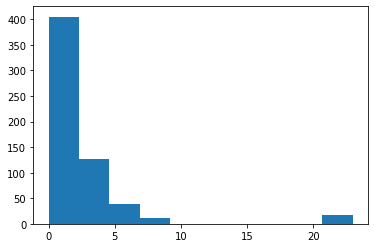

In [15]:
# Consider taking the ratios of minutes and incorporating them back in
# also consider doing the same with seconds

start_hour = start_hour.apply(lambda element: element.hour)
start_min = start_min.apply(lambda element: element.minute)
# print(start_min.describe(percentiles=[.5, .75]))

# print(start_min.value_counts())



plt.hist(start_hour)
plt.show()

In [14]:
# Data cleaning: create the 'Weekday' column; that will be the column
# to be changed given the time to bed.

# Used 'End' column to created 'Weekday' column with Datetime type.
# df['Weekday'] =  pd.to_datetime(df['End'], infer_datetime_format=True)

# Used '.dayofweek' method to have a new column contain only day of the week given the end dates
df['Weekday'] = df['Weekday'].apply(lambda time: time.dayofweek)
df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,6:14,0,1
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,6:39,0,2
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,4:47,0,3
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,4:03,0,6
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,7:30,0,0


In [13]:
# Changing dtypes for the 'Start' and 'End' columns to np.datetime64

df['Start'] = np.array(df['Start'], dtype=np.datetime64)

df['End'] = np.array(df['End'], dtype=np.datetime64)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Start             599 non-null    datetime64[ns]
 1   End               599 non-null    datetime64[ns]
 2   Sleep quality     599 non-null    float64       
 3   Time in bed       599 non-null    object        
 4   Activity (steps)  599 non-null    int64         
 5   Weekday           599 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 28.2+ KB


In [19]:
df['Time in bed'].value_counts()

05:46:00    7
04:53:00    7
05:21:00    7
05:00:00    7
04:47:00    7
           ..
06:44:00    1
00:47:00    1
08:26:00    1
02:46:00    1
00:58:00    1
Name: Time in bed, Length: 267, dtype: int64

In [20]:
# Changing dtype for 'Time in bed' column with a today's time stamp; for further cleaning
# I will remove date, and leave hours and min

df['Time in bed'] = pd.to_datetime(df['Time in bed'],
                                              infer_datetime_format=False)

TypeError: <class 'datetime.time'> is not convertible to datetime

In [17]:
# df['Time in bed'] = np.array(df['Time in bed'], dtype=np.datetime64)

df['Time in bed'].head()

0   2020-06-24 06:14:00
1   2020-06-24 06:39:00
2   2020-06-24 04:47:00
3   2020-06-24 04:03:00
4   2020-06-24 07:30:00
Name: Time in bed, dtype: datetime64[ns]

In [18]:
# It took so long to finally acheive this single line of code.  But i finally
# got the column 'Time in bed' into time format

df['Time in bed'] = df['Time in bed'].dt.time
df

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,06:14:00,0,1
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,06:39:00,0,2
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,04:47:00,0,3
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,04:03:00,0,6
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,07:30:00,0,0
...,...,...,...,...,...,...
594,2020-06-18 00:59:17,2020-06-18 08:30:35,0.79,07:31:00,545,3
595,2020-06-19 00:07:05,2020-06-19 00:55:11,0.09,00:48:00,752,4
596,2020-06-19 01:12:06,2020-06-19 08:20:54,0.69,07:08:00,752,4
597,2020-06-19 23:30:01,2020-06-20 05:01:20,0.54,05:31:00,2123,5


## Creating a series of columns based on dates: 'Start Date' and 'End Date' columns

### But why?
- when thinking about visualizations, the dates have to align accordingly.
- when I slept later than 12:00 the Start Date == End Date but the times don't; I'll see how to work with this later when i get to visualizations.

In [21]:
# Creating a column containg the dates, and then creating a column cointaning
# time to bed, and time to rise

df['Date'] = df['Start'].dt.date
df['Date']

0      2018-08-21
1      2018-08-22
2      2018-08-23
3      2018-08-26
4      2018-08-27
          ...    
594    2020-06-18
595    2020-06-19
596    2020-06-19
597    2020-06-19
598    2020-06-21
Name: Date, Length: 599, dtype: object

In [22]:
# replacing ints in 'Weekday' column with days of the week using a dictionary

d = {0: 'Monday', 
     1: 'Tuesday', 
     2: 'Wednesday', 
     3: 'Thursday', 
     4: 'Friday',
     5: 'Saturday', 
     6: 'Sunday'}
     
df['Weekday categories'] = df['Weekday'].map(d)
df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday,Date,Weekday categories
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,06:14:00,0,1,2018-08-21,Tuesday
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,06:39:00,0,2,2018-08-22,Wednesday
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,04:47:00,0,3,2018-08-23,Thursday
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,04:03:00,0,6,2018-08-26,Sunday
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,07:30:00,0,0,2018-08-27,Monday


In [27]:
# we need categorical variable to do a Chi**2 test


cut_points = [0, 0.20, .40, .60, .80, 1]

label_names = ['0% - 20%', 
               '21% - 40%', 
               '41% - 60%',
               '61% - 80%',
               '> 81%']
               
df['Sleep Quality Categories'] = pd.cut(df['Sleep quality'], cut_points, labels=label_names)


In [28]:
# New Dataframe excluding the 'Wake up' and 'Sleep Notes' column

new_df = df[['Start', 
             'End', 
             'Sleep quality', 
             'Time in bed',
             'Activity (steps)', 
             'Weekday', 
             'Date', 
             'Sleep Quality Categories',
             'Weekday categories']]
                        
new_df.head()

,Start,End,Sleep quality,Time in bed,Activity (steps),Weekday,Date,Sleep Quality Categories,Weekday categories
0,2018-08-21 00:17:44,2018-08-21 06:31:59,0.55,06:14:00,0,1,2018-08-21,41% - 60%,Tuesday
1,2018-08-22 00:08:58,2018-08-22 06:48:15,0.77,06:39:00,0,2,2018-08-22,61% - 80%,Wednesday
2,2018-08-23 00:26:59,2018-08-23 05:14:15,0.57,04:47:00,0,3,2018-08-23,41% - 60%,Thursday
3,2018-08-26 02:22:35,2018-08-26 06:25:43,0.35,04:03:00,0,6,2018-08-26,21% - 40%,Sunday
4,2018-08-27 00:54:25,2018-08-27 08:24:27,0.62,07:30:00,0,0,2018-08-27,61% - 80%,Monday


In [29]:
'''Not gonna use the following lines of code because they are not relavent'''

# new_df['Start'] = new_df['Start'].dt.time
# new_df['End'] = new_df['End'].dt.time

'Not gonna use the following lines of code because they are not relavent'

## Left off here, still not sure what the approach is to keeping 'new_df['Date'] column active

In [ ]:
new_df['Date'] = pd.DataFrame(new_df['Date'].drop_duplicates(keep='first'))
new_df['Date']

In [30]:
# looking at the element type in the column 'Date'

type(new_df['Date'][0])

datetime.date

In [31]:
# Changing 'Time in bed' column values to floats

# print((float(new_df['Time in bed'][0].minute)/60) + (float(new_df['Time in bed'][0].hour)))

In [32]:
# running a for loop to change the hour and minute values in the 'Time in bed'
# column into float types for analysis

df = []
for i in new_df['Time in bed']:
  df.append(round((float(i.minute)/60) + (float(i.hour)),2))

new_df['Time in bed'] = np.array(df)
new_df['Time in bed']

0      6.23
1      6.65
2      4.78
3      4.05
4      7.50
       ... 
414    5.58
415    6.95
416    5.38
417    5.80
418    5.50
Name: Time in bed, Length: 419, dtype: float64

In [33]:
# print(new_df.info())
# print(new_df.isnull().any())
# print(new_df.describe())
new_df['Weekday'].value_counts()

2    70
1    67
4    65
3    61
0    56
6    50
5    50
Name: Weekday, dtype: int64

In [34]:
# Creating a contingency table of observed values from
# 'Weekday' and 'Sleep Quality Categories' columns

new_df['Weekday categories'].value_counts()

observed = pd.crosstab(new_df['Weekday categories'], 
                       new_df['Sleep Quality Categories'])

observed

Sleep Quality Categories,0% - 30%,31% - 60%,>60%
Weekday categories,,,
Friday,7,46,12
Monday,12,29,14
Saturday,5,28,17
Sunday,3,34,13
Thursday,6,44,10
Tuesday,11,47,9
Wednesday,12,50,8


In [35]:
# Null Hypothesis: There will be no difference in quality of sleep based on
# day of the week
# Alt Hypothesis:  There is a difference in quality of sleep based on day of the
# week.

# A p-value result of  <.05 allows us to reject the Null Hypothesis; implying 
# that there is independence, and therefore the quality of sleep is affected by 
# day of the week

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f'Chi-Squared: {chi_squared}', '\n')
print(f'P-value: {p_value}', '\n')
print(f'Degrees of Freedom: {dof}', '\n')
print('Expected: \n', np.array(expected))

Chi-Squared: 21.897116793859418 

P-value: 0.03868919656641533 

Degrees of Freedom: 12 

Expected: 
 [[ 8.72901679 43.33333333 12.93764988]
 [ 7.38609113 36.66666667 10.94724221]
 [ 6.7146283  33.33333333  9.95203837]
 [ 6.7146283  33.33333333  9.95203837]
 [ 8.05755396 40.         11.94244604]
 [ 8.99760192 44.66666667 13.33573141]
 [ 9.40047962 46.66666667 13.93285372]]


In [36]:

print('P-value from chi^2 statistic:', chi2.sf(chi_squared, 12))

P-value from chi^2 statistic: 0.03868919656641533


In [37]:
# Taking counts for plotting

Friday = observed.iloc[0][0:].values
Monday = observed.iloc[1][0:].values
Saturday = observed.iloc[2][0:].values
Sunday = observed.iloc[3][0:].values
Thursday = observed.iloc[4][0:].values
Tuesday = observed.iloc[5][0:].values
Wednesday = observed.iloc[5][0:].values


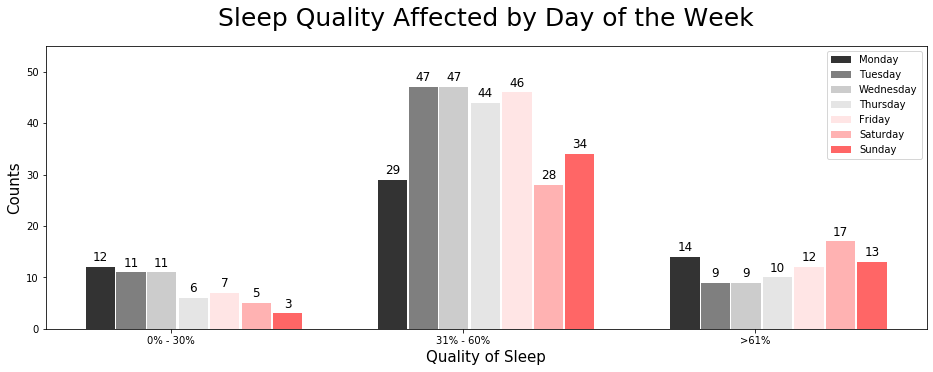

In [38]:
labels = ['0% - 30%', '31% - 60%', '>61%']
Friday = observed.iloc[0][0:].values
Monday = observed.iloc[1][0:].values
Saturday = observed.iloc[2][0:].values
Sunday = observed.iloc[3][0:].values
Thursday = observed.iloc[4][0:].values
Tuesday = observed.iloc[5][0:].values
Wednesday = observed.iloc[5][0:].values

x = np.arange(len(labels))  # the label locations
width = 0.08  # the width of the bars

fig, ax = plt.subplots(figsize=(13,5))
rects1 = ax.bar(x - width*3.002, 
                Monday, 
                .1, 
                label='Monday', 
                color='black',
                alpha=.8)
rects2 = ax.bar(x - width*1.7, 
                Tuesday, 
                .1, 
                label='Tuesday', 
                color='black',
                alpha=.5)
rects3 = ax.bar(x - width*.39, 
                Wednesday, 
                .1, 
                label='Wednesday', 
                color='black',
                alpha=.2)
rects4 = ax.bar(x + width*.96, 
                Thursday, 
                .1, 
                label='Thursday', 
                color='black',
                alpha=.1)
rects5 = ax.bar(x + width*2.31, 
                Friday, 
                .1, 
                label='Friday', 
                color='red',
                alpha=.1)
rects6 = ax.bar(x + width*3.665, 
                Saturday, 
                .1, 
                label='Saturday', 
                color='red',
                alpha=.3)
rects7 = ax.bar(x + width*5, 
                Sunday, 
                .1, 
                label='Sunday', 
                color='red',
                alpha=.6)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Sleep Quality Affected by Day of the Week', 
             size=25, 
             y=1.05)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 55)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', 
                    va='bottom', 
                    size=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)


# consider doing a dist plot or scatter plot with the given parameters as a next step
# also, look into a violoin plot; plotly for the following 

fig.tight_layout()
plt.xlabel('Quality of Sleep', size=15)
plt.ylabel('Counts', size=15)
plt.show() 

In [40]:
data = px.data.gapminder()

# new_df = px.data.data(new_df)
sleep_quality_hist = px.histogram(new_df, 
                                  x='Sleep quality',
                                  #  histnorm='percent',
                                  histnorm='probability density',
                                  #  nbins=0,
                                  #  range_x=(0, .3)),
                                  # marginal='rug',
                                  nbins=47,
                                  title='Sleep Quality Distribtion',
                                  labels={'Sleep quality': 'Sleep Quality Distribution'})

# Bar plot: average time asleep, 

avg_tbed = go.Figure()

avg_tbed.add_trace(go.Box(y=new_df['Time in bed'], 
                          name='Time Asleep',   
                          marker_color='royalblue',    
                          boxmean='sd',
                          boxpoints='all', # represent mean and standard deviation
                          notched=True,), )
avg_tbed.update_layout(title_text='Time Asleep (h) Statistics')


timbd_v_qual = px.bar(new_df, 
                      x='Sleep quality', 
                      y='Time in bed',
                      hover_data=['Sleep quality'], 
                      color='Sleep quality',
                      labels={'Time in bed' : 'Time Asleep (h)',
                              'Sleep quality': 'Quality of Sleep'}, 
                      height=400,
                      title='Sample Distribution: Sleep Quality and Time Asleep as it Relates to Activity')

act_v_qual = px.bar(new_df, 
                    x='Sleep quality', 
                    y='Activity (steps)',
                    hover_data=['Sleep quality', 'Time in bed'], 
                    color='Time in bed',
                    labels={'Sleep quality': 'Quality of Sleep Distribution',
                            'Activity (steps)': 'Activity (steps)'}, 
                    height=400,
                    title='Sample Distribution: Sleep Quality as it Relates to Time Asleep')


# data = px.data.ne 
qual_v_wkdy = px.box(new_df, 
                     x='Weekday categories',
                     y='Sleep quality',
                     #  range_y=(0, .4), 
                     points='suspectedoutliers', 
                     category_orders={'Weekday categories':
                                      ['Monday', 'Tuesday', 'Wednesday', 
                                       'Thursday', 'Friday', 'Saturday', 
                                       'Sunday']},
                     notched=True,
                     title='Sleep Quality Throughout the Week',
                     labels={'Weekday categories': 'Day of the Week',})


sleep_quality_hist.show()
avg_tbed.show()
qual_v_wkdy.show()
timbd_v_qual.show()
act_v_qual.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
IFrame(src= "https://dash-simple-apps.plotly.host/dash-boxplot/code", 
       width="100%", 
       height=500, 
       frameBorder="0")

# data = px.data.ne 
qual_v_wkdy = px.box(new_df, 
                     x='Weekday categories',
                     y='Sleep quality',
                     #  range_y=(0, .4), 
                     points='suspectedoutliers', 
                     category_orders={'Weekday categories':
                                      ['Monday', 'Tuesday', 'Wednesday', 
                                       'Thursday', 'Friday', 'Saturday', 
                                       'Sunday']},
                     notched=True)
qual_v_wkdy.show()

In [ ]:
new_df.head()

In [ ]:
new_df.head()

In [ ]:

new_df['Start by hour'] = pd.to_datetime(df['Start'],
                                         infer_datetime_format=True)

new_df['Start by hour'] = np.array(new_df['Start by hour'], 
                                   dtype=np.datetime64)

new_df['Start by hour'] = new_df['Start by hour'].dt.hour

new_df['End by hour'] = pd.to_datetime(df['End'],
                                       infer_datetime_format=True)

new_df['End by hour'] = np.array(new_df['End by hour'], 
                                 dtype=np.datetime64)

new_df['End by hour'] = new_df['End by hour'].dt.hour

new_df['Start by week'] = pd.to_datetime(df['Start'],
                                         infer_datetime_format=True)

new_df['Start by week'] = np.array(new_df['Start by week'], 
                                   dtype=np.datetime64)

new_df['Start by week'] = new_df['Start by week'].dt.week

new_df.head()

In [ ]:
new_df['Start by hour'].value_counts()

In [ ]:
# Scatter plot of the time i go to sleep/wake


# import plotly.express as px
# # iris = px.data.new_df() # iris is a pandas DataFrame
# fig = px.scatter(new_df, x='Start by hour', y='Sleep quality')
# fig.show()


tbed_v_bedt = px.scatter(new_df, 
                         x='Start by hour', 
                         y='Time in bed', 
                         color='Sleep quality', 
                         hover_data=['Sleep quality'],
                         size='Sleep quality',
                         title='Sleep Quality Affected by Bed Time',
                         labels={'Start by hour': 'Bed Time',
                                 'Time in bed': 'Time Asleep (hrs)'},)

tbed_v_wkup = px.scatter(new_df, 
                         x='End by hour', 
                         y='Time in bed', 
                         color='Sleep quality',  
                         hover_data=['Sleep quality'],
                         size='Sleep quality',
                         title='Sleep Quality Affected by Wake-up Time',
                         labels={'End by hour': 'Wake-up Time',
                                 'Time in bed': 'Time Asleep (hrs)'})



wkup_v_bedt = px.scatter(new_df, 
                         x='Start by hour', 
                         y='End by hour', 
                         color='Sleep quality',  
                         hover_data=['Sleep quality', 'Time in bed'],
                         range_x=(-1, 10), 
                         range_y=(0, 15), 
                         size='Sleep quality',
                         title='Early to Bed Late to Rise = Better Sleep',
                         labels={'End by hour': 'Wake-up Time',
                                 'Start by hour': 'Bed Time'})

tbed_v_bedt.show()
tbed_v_wkup.show()
wkup_v_bedt.show()

In [ ]:
weather_df = pd.read_csv('/content/1950768.csv')
weather_df

In [ ]:
weather_df = weather_df.dropna()
weather_df

In [ ]:
weather_df = pd.DataFrame(weather_df.drop(columns='STATION'))
weather_df

In [ ]:
weather_df['DATE'] = weather_df['DATE'].drop_duplicates(keep='first')
weather_df.shape

In [ ]:
weather_df = weather_df.dropna()
print(weather_df.shape)
weather_df.head(3)

In [ ]:
weather_df.columns = ['Date', 'AvgWnd', 'TAvg']

weather_df['Date'] = weather_df['Date'].astype(str)

print(weather_df.head(3))

weather_df.shape

In [ ]:
new_df['Date'] = new_df['Date'].astype(str)

In [ ]:
left = new_df
right = weather_df

concat_df = pd.merge(new_df, 
                     weather_df, 
                     on='Date', 
                     how='inner')
concat_df

In [ ]:
concat_df['Sleep Quality Categories'].isna().sum()

In [ ]:
concat_df = concat_df.dropna()
print(concat_df.shape)
print(concat_df.isnull().any())
concat_df.head(3)

In [ ]:
# concat_df['Date'] = concat_df['Date'].drop_duplicates(keep='first')
# concat_df['Date'] = concat_df['Date'].dropna()
# print(concat_df.shape)
# concat_df.head(4)

In [ ]:
slp_qual_v_dt = px.scatter(concat_df, 
                           x='Date', 
                           y='TAvg', 
                           color='Sleep quality', 
                           size='Time in bed', 
                           hover_data=['Sleep quality'],
                           labels={'Date': 'Time of Year',
                                 'TAvg': 'Average T (F)'},
                           title='Sleep Affected by Temperature')

# comp_grph = px.scatter(concat_df, 
#                        x='Date', 
#                        y='TAvg', 
#                        color='Sleep quality', 
#                        size='Time in bed', 
#                        hover_data=['Sleep quality'],
#                        labels={'Date': 'Time of Year',
#                                 'TAvg': 'Average T (F)'})

time_v_temp = px.scatter(concat_df, 
                         x='Date', 
                         y='TAvg',
                         color='TAvg', 
                         size='TAvg',
                         hover_data=['Sleep quality'],
                         labels={'Date': 'Time of Year',
                                 'TAvg': 'Average T (F)'},
                         title='Temperature Through the Year')

slp_qual_v_wnd = px.scatter(concat_df, 
                            x='Date', 
                            y='AvgWnd', 
                            color='Sleep quality', 
                            size='Time in bed', 
                            hover_data=['Sleep quality'],
                            labels={'Date': 'Time of Year',
                                 'AvgWnd': 'Average Wind Speed (m/s)'},
                            title='Sleep Affected by Wind Speeds')

time_v_wnd = px.scatter(concat_df, 
                        x='Date', 
                        y='AvgWnd', 
                        color='AvgWnd', 
                        size='AvgWnd',   
                        hover_data=['Sleep quality'],
                        labels={'Date': 'Time of Year',
                              'AvgWnd': 'Average Wind Speed (m/s)'},
                        title='Wind Speeds Through the Year')

slp_qual_v_time_in_bed = px.scatter(concat_df, 
                                    x='Time in bed', 
                                    y='Sleep quality', 
                                    color='Sleep quality', 
                                    size='Time in bed', 
                                    hover_data=['Sleep quality'],
                                    labels={'Time in bed': 'Time Asleep (h)'},
                                    title='Sleep Quality Affected by Time Asleep')

# comp_grph.show()
time_v_temp.show()
time_v_wnd.show()
slp_qual_v_wnd.show()
slp_qual_v_dt.show()
slp_qual_v_time_in_bed.show()